TP2 : Classification using Linear & Quadratic Discriminant Analysis
===


First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
train = np.loadtxt('synth_train.txt')
test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication  : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._


In [3]:
N  = len(train)
N1 = len(train[train[:,0]==1])
N2 = len(train[train[:,0]==2])

X1 = train[train[:,0]==1][:,1:] #Coordinates of points belonging to class 1
X2 = train[train[:,0]==2][:,1:] #Coordinates of points belonging to class 2

pi_1, pi_2 = N1/N, N2/N

mu_1 = np.array([np.sum(X1[:,0]), np.sum(X1[:,1])])/N1
mu_2 = np.array([np.sum(X2[:,0]), np.sum(X2[:,1])])/N2

sigma_1 = (X1-mu_1).T.dot(X1-mu_1)/N1
sigma_2 = (X2-mu_2).T.dot(X2-mu_2)/N2


# Linear Discriminant Analysis

In [4]:
sigma = (N1*sigma_1 + N2*sigma_2)/N

def yk_LDA(x, pi, mu, sigma): # Computes log-probability of belonging to a class
    sigmaI = inv(sigma)
    return log(pi) + x.dot(sigmaI).dot(mu.T) - 0.5*mu.dot(sigmaI).dot(mu.T)

def classify_LDA(x, pi_1, pi_2, mu_1, mu_2, sigma): 
    return argmax([yk_LDA(x, pi_1, mu_1, sigma), yk_LDA(x, pi_2, mu_2, sigma)]) + 1

In [5]:
Dec_LDA = np.array([classify_LDA(x, pi_1, pi_2, mu_1, mu_2, sigma) for x in test[:,1:]]) # Classifies each point of the test set

errorLDA = np.sum(abs(Dec_LDA - test[:,0]))/len(test) # Computes error rate of the classifier 
print("Error rate for LDA: ", errorLDA*100, '%')

Error rate for LDA:  5.5 %


In [6]:
Nx1=100 # number of samples for display
Nx2=100
x1 = np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2 = np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis

x = np.array([[x1[i],x2[j]] for i in range(Nx1) for j in range(Nx2)])

# classes for samples
Dec_x = np.array([classify_LDA(vect, pi_1, pi_2, mu_1, mu_2, sigma) for vect in x])
class_1 = x[Dec_x == 1]
class_2 = x[Dec_x == 2]

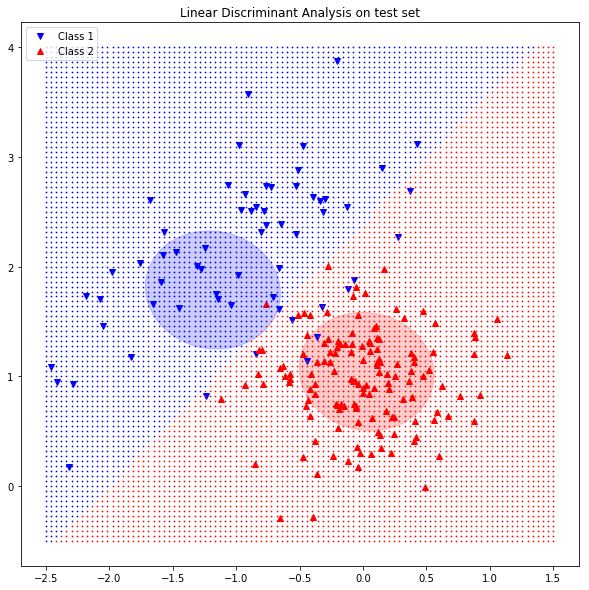

In [7]:
plt.figure(figsize=(10,10))

# plot targets from test set
plt.plot(test[test[:,0]==1][:,1], test[test[:,0]==1][:,2], 'bv')
plt.plot(test[test[:,0]==2][:,1], test[test[:,0]==2][:,2], 'r^')

# plot regions 
plt.plot(class_1[:,0], class_1[:,1], 'b.', markersize = 1.5)
plt.plot(class_2[:,0], class_2[:,1], 'r.', markersize = 1.5)


plt.legend(['Class 1', 'Class 2'])

# plot gaussian ellipse for class 1
w, v1 = linalg.eigh(sigma) 
u1 = v1[0] / linalg.norm(v1[0])
angle1 = 180*np.arctan(u1[1] / u1[0])/np.pi
ell1 = matplotlib.patches.Ellipse(mu_1, 2*np.sqrt(sigma[0,0]), 2*np.sqrt(sigma[1,1]), angle1, color = 'b', alpha = 0.2)
ax = plt.gca()
ax.add_patch(ell1)

# plot gaussian ellipse for class 2 
w, v = linalg.eigh(sigma) 
u = v[0] / linalg.norm(v[0])
angle = 180*np.arctan(u[1] / u[0])/np.pi
ell2 = matplotlib.patches.Ellipse(mu_2, 2*np.sqrt(sigma[0,0]), 2*np.sqrt(sigma[1,1]), angle, color = 'r', alpha = 0.2)
ax = plt.gca()
ax.add_patch(ell2)

plt.title('Linear Discriminant Analysis on test set')

plt.show()

# Quadratic Discriminant Analysis

In [8]:
def yk_QDA(x, pi, mu, sigma): # Computes log-probability of belonging to a class
    sigmaI = inv(sigma)
    return log(pi) + x.dot(sigmaI).dot(mu.T) - 0.5*mu.dot(sigmaI).dot(mu.T) - 0.5*log(det(sigma)) -0.5*x.dot(sigmaI).dot(x.T)

def classify_QDA(x, pi_1, pi_2, mu_1, mu_2, sigma_1, sigma_2): 
    return argmax([yk_QDA(x, pi_1, mu_1, sigma_1), yk_QDA(x, pi_2, mu_2, sigma_2)]) + 1

In [9]:
Dec_QDA = np.array([classify_QDA(x, pi_1, pi_2, mu_1, mu_2, sigma_1, sigma_2) for x in test[:,1:]]) 

errorQDA = np.sum(abs(Dec_QDA - test[:,0]))/len(test) # Computes error rate of the classifier 
print("Error rate for QDA: ", errorQDA*100, '%')

Error rate for QDA:  5.0 %


In [10]:
# classify samples using quadratic analysis
Decq_x = np.array([classify_QDA(vect, pi_1, pi_2, mu_1, mu_2, sigma_1, sigma_2) for vect in x])
classq_1 = x[Decq_x == 1]
classq_2 = x[Decq_x == 2]

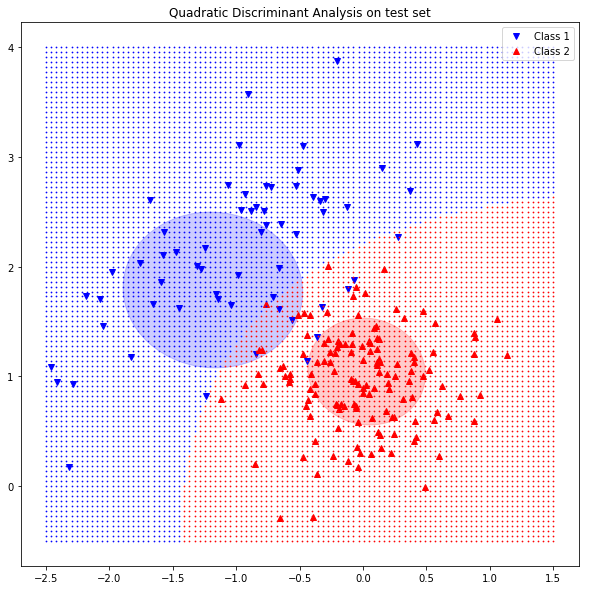

In [11]:
plt.figure(figsize=(10,10))

# plot test set
plt.plot(test[test[:,0]==1][:,1], test[test[:,0]==1][:,2], 'bv')
plt.plot(test[test[:,0]==2][:,1], test[test[:,0]==2][:,2], 'r^')

# plot regions 
plt.plot(classq_1[:,0], classq_1[:,1], 'b.', markersize = 1.5)
plt.plot(classq_2[:,0], classq_2[:,1], 'r.', markersize = 1.5)


plt.legend(['Class 1', 'Class 2'])

# plot gaussian ellipse for class 1
w, v1 = linalg.eigh(sigma_1) 
u1 = v1[0] / linalg.norm(v1[0])
angle1 = 180*np.arctan(u1[1] / u1[0])/np.pi
ell1 = matplotlib.patches.Ellipse(mu_1, 2*np.sqrt(sigma_1[0,0]), 2*np.sqrt(sigma_1[1,1]), angle1, color = 'b', alpha = 0.2)
ax = plt.gca()
ax.add_patch(ell1)

# plot gaussian ellipse for class 2
w, v = linalg.eigh(sigma_2) 
u = v[0] / linalg.norm(v[0])
angle = 180*np.arctan(u[1] / u[0])/np.pi
ell2 = matplotlib.patches.Ellipse(mu_2, 2*np.sqrt(sigma_2[0,0]), 2*np.sqrt(sigma_2[1,1]), angle, color = 'r', alpha = 0.2)
ax = plt.gca()
ax.add_patch(ell2)

plt.title('Quadratic Discriminant Analysis on test set')


plt.show()

## Comparison & comments

The **QDA** reduced the error rate from **5.5%** to **5.0%** which is not very significative in this case.

In fact, as there are not many points located around the linear boundary and some points from class 1 cannot be distinguished from the red region simply by a linear or quadratic discrimination, upgrading from LDA to QDA didn't improve the result.

Moreover, the **K-NN** algorithm (optimized K=3), yielded to a better result : **4.5%**, and managed to distinguish more points in the incertain area. 

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




In [12]:
X = train[:,1:]
t = train[:,0]
#sklearn lda
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
Lpred = lda.fit(X,t).predict(test[:,1:]) # fit to train, then predict

errorLDAsk = np.sum(abs(Lpred - test[:,0]))/len(test) # Computes error rate of the classifier 
print("Error rate for LDA scikit-learn: ", errorLDAsk*100, '%')

Error rate for LDA scikit-learn:  5.5 %


In [13]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
Qpred = qda.fit(X,t).predict(test[:,1:])

errorQDAsk = np.sum(abs(Qpred - test[:,0]))/len(test) # Computes error rate of the classifier 
print("Error rate for QDA scikit-learn: ", errorQDAsk*100, '%')

Error rate for QDA scikit-learn:  5.0 %


Scikit-learn algorithms confirmed our results.

After analyzing the example given in the link above, we found that the quadratic form may take different forms, it could be :
- Parabolic
- Hyperbolic
- Elliptic

The last figure may let us think that it's a kind of linear multiclass discrimination, but after zooming out we found that the quadratic estimation was hyperbolic as seen in the figure bellow.

![sklrn](scikit-learn_example.png)

The second figure shows that the boundary is localy significant but clearly our samples aren't localized inside and outside an ellipse. We must then update our classifier regulary, so that it could fit with our data distributions. 